In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Table Of Contents

* [EDA](#EDA)
* [Feature Engineering](#Feature-Engineering)
* [Training and Modeling](#Training-and-Modeling)
* [Prediction](#Prediction)

In [24]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv",index_col=0)
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv",index_col=0)

In [4]:
with open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt") as f:
    content = f.read()
    print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<a id="EDA"></a>
# EDA

In [5]:
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

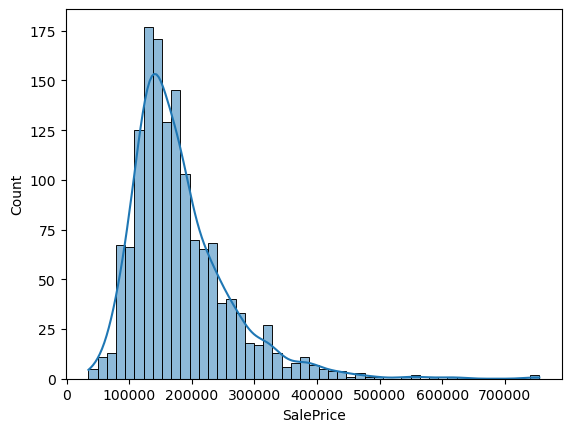

In [22]:
# visualize the distribution of SalePrice (target)
sns.histplot(train_df['SalePrice'],kde=True)

In [17]:
numerical = train_df.select_dtypes('number').columns
print('Number of Numerical Features: ' + str(train_df[numerical].shape[1]))
print('--'*40)
print('List of Numerical Features: ')
train_df[numerical].columns

Number of Numerical Features: 37
--------------------------------------------------------------------------------
List of Numerical Features: 


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

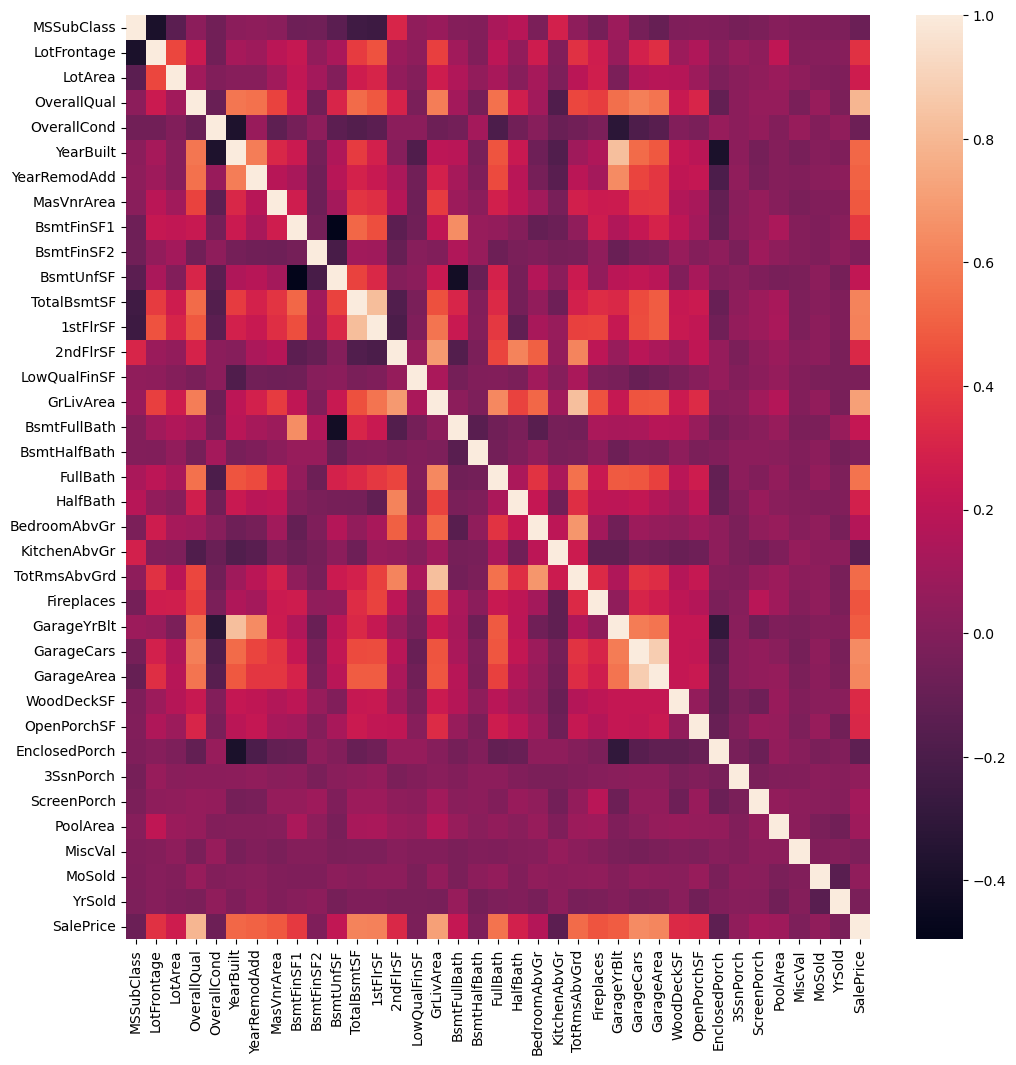

In [22]:
# Visualize correlations between numerical features
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr())

<a id="Feature-Engineering"></a>
#  Feature Engineering

## Missing Values

In [7]:
# check which features include missing values
missing_values_col = list(train_df.columns[train_df.isna().mean()!=0])
missing_values_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
# sort the features by percentage of missing values
train_df[missing_values_col].isna().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

<AxesSubplot:>

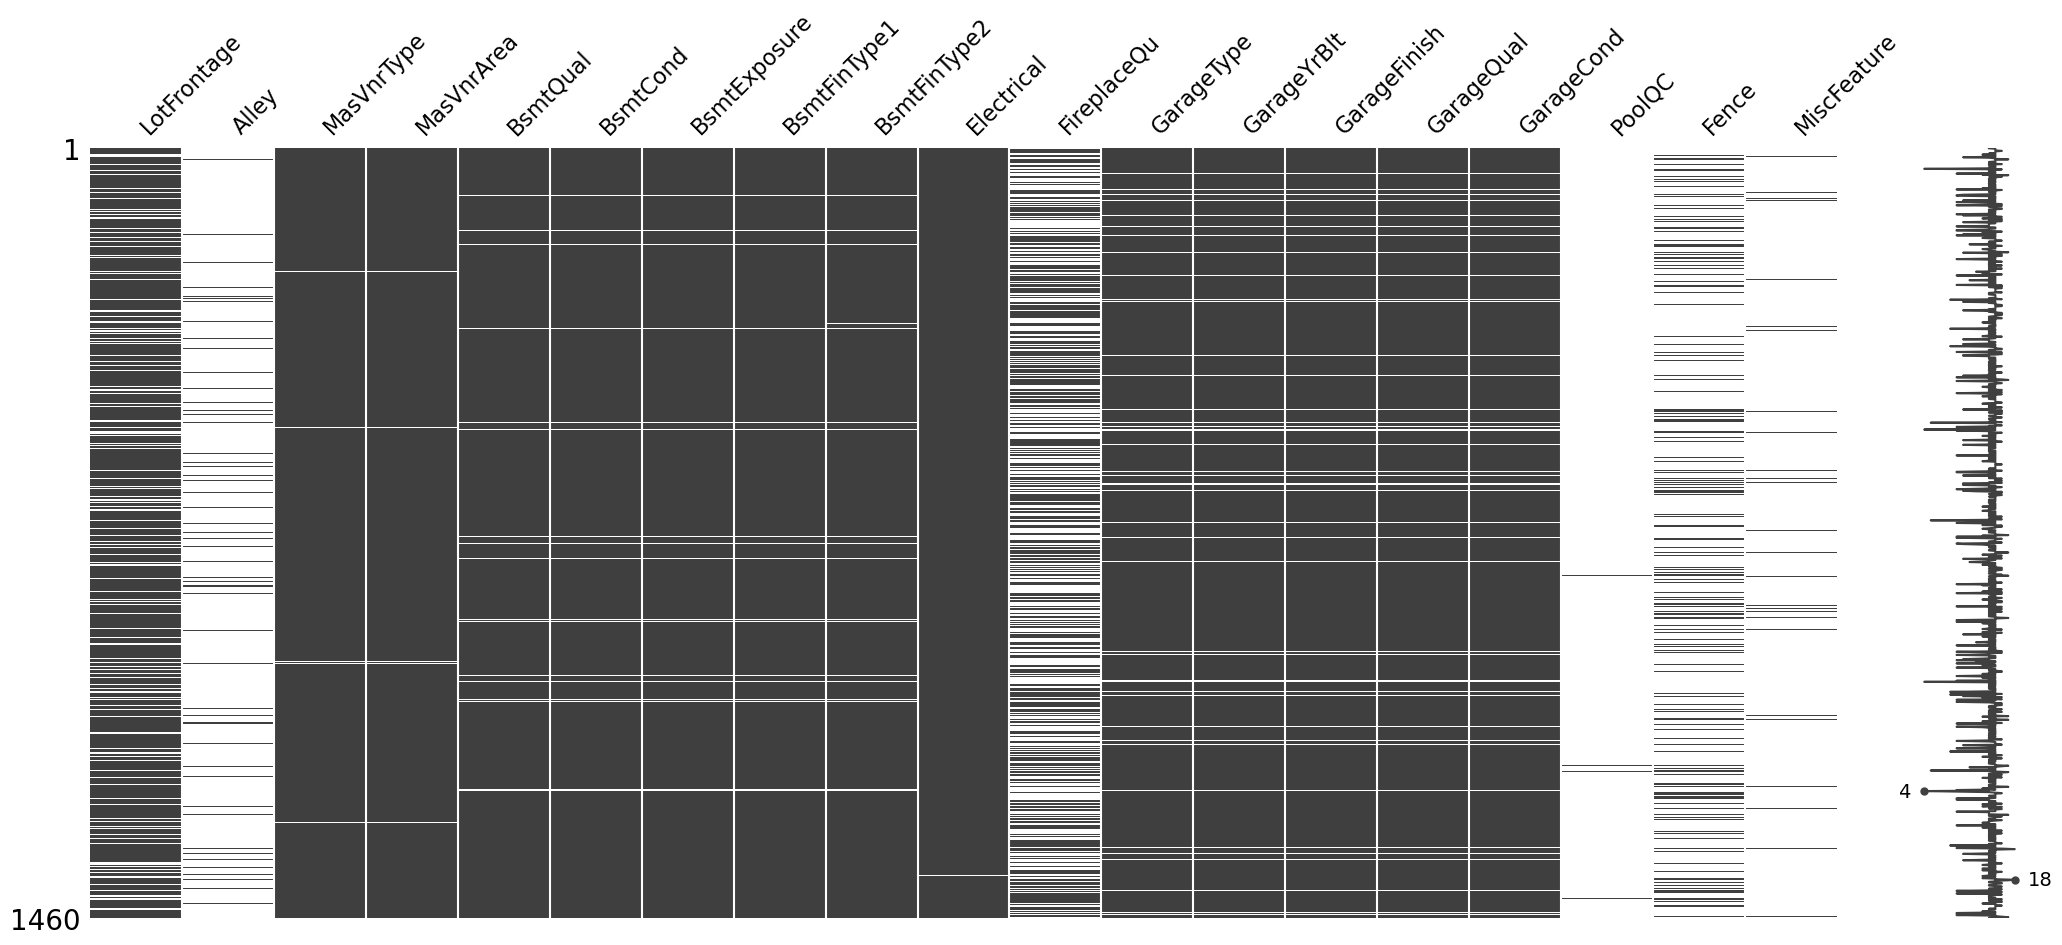

In [20]:
# visualize where missing values are in each features
import missingno as msno
msno.matrix(train_df[missing_values_col])

In [15]:
# drop three features in where missing values are more than 90% of total entries
train_df.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)

(1460, 77)

<a id="Training-and-Modeling"></a>
# Model Selection and Training

In [30]:
import warnings
warnings.filterwarnings("ignore")

## Models using scikit-learn

In [37]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import classification_report

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
classification_report(y_test, predictions)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Models using tensorflow
Since TFDF supports all of numerical, categorical and missing features, train_df used below is from before feature engineering.



In [25]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [26]:
# create training and validation datasets
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

997 examples in training, 463 examples in testing.


In [27]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [31]:
# create tensorflow RandomForestModel and fit 
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.fit(train_ds)

Use /tmp/tmpmfvdkh69 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.764796. Found 997 examples.
Training model...


[INFO 2023-03-21T03:42:54.830127883+00:00 kernel.cc:1214] Loading model from path /tmp/tmpmfvdkh69/model/ with prefix 292e348f839d42d7
[INFO 2023-03-21T03:42:55.028212217+00:00 decision_forest.cc:661] Model loaded with 300 root(s), 94730 node(s), and 73 input feature(s).
[INFO 2023-03-21T03:42:55.028410947+00:00 abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 2023-03-21T03:42:55.028569597+00:00 kernel.cc:1046] Use fast generic engine


Model trained in 0:00:01.340187
Compiling model...
Model compiled.


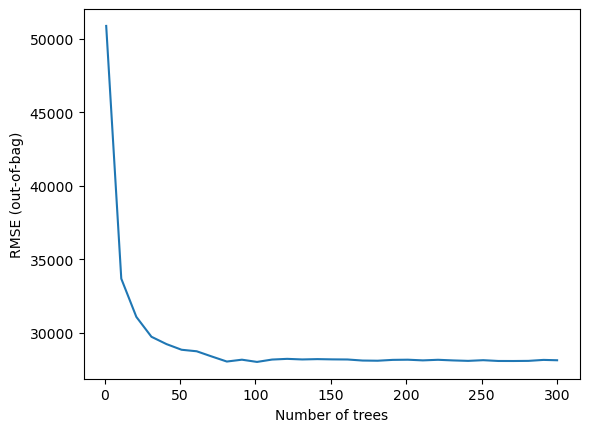

In [29]:
# visualize errors according to number of trees
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [34]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 222ms/step - loss: 0.0000e+00
loss: 0.0000
